In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib. pyplot as plot
import seaborn as sns
%matplotlib inline

In [15]:
walmart_data=pd.read_csv("Walmart_Store_sales.csv")

In [4]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
walmart_data.shape

(6435, 8)

In [6]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
walmart_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

<AxesSubplot:title={'center':'Maximum sales by store'}, xlabel='Store'>

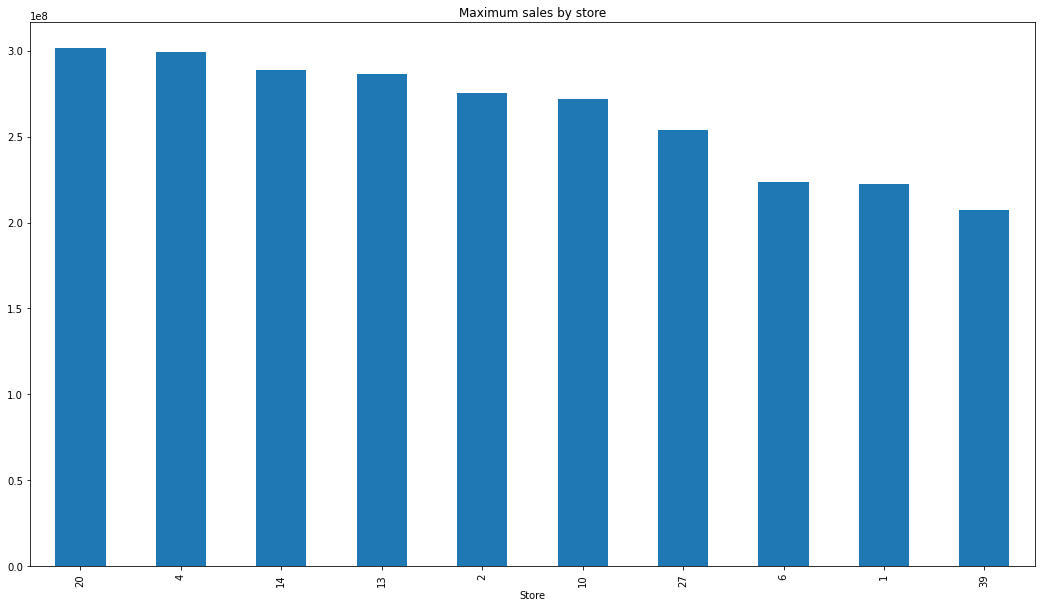

In [17]:
#Which store has maximum sales
store_max= walmart_data.groupby('Store')
plot.figure(figsize=(18,10))
store_max['Weekly_Sales'].sum().sort_values(ascending= False).head(10).plot(kind='bar', title='Maximum sales by store')

In [20]:
standard= walmart_data.groupby('Store')['Weekly_Sales'].std()
standard.head()

Store
1    155980.767761
2    237683.694682
3     46319.631557
4    266201.442297
5     37737.965745
Name: Weekly_Sales, dtype: float64

In [21]:
mean=walmart_data.groupby('Store')['Weekly_Sales'].mean()
mean.head()

Store
1    1.555264e+06
2    1.925751e+06
3    4.027044e+05
4    2.094713e+06
5    3.180118e+05
Name: Weekly_Sales, dtype: float64

In [22]:
list_df=list(zip(standard,mean))
stat_df=pd.DataFrame(list_df,columns=['Standard_dev','Mean'])
stat_df.head()

,Standard_dev,Mean
0,155980.767761,1.555264e+06
1,237683.694682,1.925751e+06
2,46319.631557,4.027044e+05
3,266201.442297,2.094713e+06
4,37737.965745,3.180118e+05


In [23]:
stat_df.corr()

,Standard_dev,Mean
Standard_dev,1.000000,0.928216
Mean,0.928216,1.000000


In [24]:
# seperating records yearwise
walmart_data.Date=pd.to_datetime(walmart_data.Date)
walmart_data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [29]:
walmart_data['Week']=walmart_data['Date'].dt.isocalendar().week
walmart_data['Year']=walmart_data['Date'].dt.year
walmart_data['Month']=walmart_data['Date'].dt.month
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,2010,5


In [30]:
df_2012_m= walmart_data.groupby('Year')
df_2012=df_2012_m.get_group(2012)
df_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Month
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,22,2012,6
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2,2012,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,3,2012,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,4,2012,1
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,9,2012,3


In [32]:
df_2012['Quarter']=df_2012['Date'].dt.quarter
df_2012.head()

C:\Users\Naina\AppData\Local\Temp/ipykernel_23296/2721112064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['Quarter']=df_2012['Date'].dt.quarter


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Month,Quarter
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,22,2012,6,2
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2,2012,1,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,3,2012,1,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,4,2012,1,1
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,9,2012,3,1


<AxesSubplot:title={'center':'Maximum sales by store in quarter 3: Y-2012'}, xlabel='Store'>

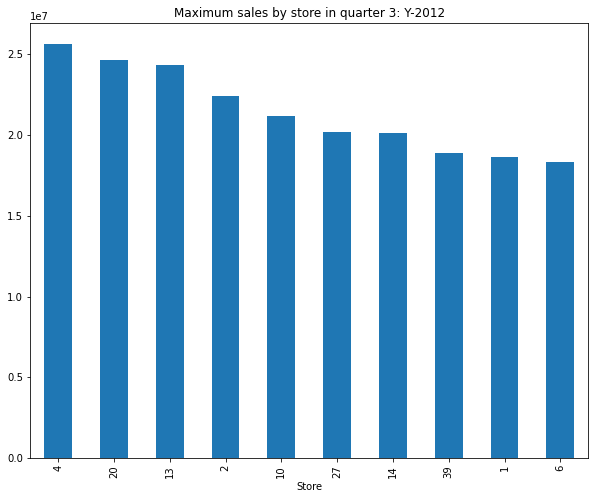

In [41]:
df_2012_q= df_2012.groupby('Quarter')
df_q3= df_2012_q.get_group(3)
df_q3=df_q3.groupby('Store')
plot.figure(figsize=(10,8))
df_q3['Weekly_Sales'].sum().sort_values(ascending= False).head(10).plot(kind='bar', title='Maximum sales by store in quarter 3: Y-2012')

### store #4 made the highest sales in third quarter in year 2012

In [42]:
store_holiday= walmart_data[walmart_data['Holiday_Flag']==1]
store_nonholi=walmart_data[walmart_data['Holiday_Flag']==0]

In [44]:
store_holiday.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Week                    UInt32
Year                     int64
Month                    int64
dtype: object

In [49]:
#superbowl holiday : 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
holi_supbowl = store_holiday[(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('12-02-2010')) |(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('11-02-2011'))|(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('10-02-2012'))|(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('08-02-2013'))]

In [50]:
#Stores Sales in Labour Day
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
holi_Labor = store_holiday[(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('10-09-2010')) |(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('09-09-2011'))|(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('07-09-2012'))|(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('06-09-2013'))]
#Stores Sales in Thanks Giving
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
holi_thanks = store_holiday[(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('26-11-2010')) |(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('25-11-2011'))|(pd.to_datetime(store_holiday['Date']) ==pd.to_datetime('23-11-2012'))|(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('29-11-2013'))]
#Stores Sales in Christmas
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
holi_xmas = store_holiday[(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('31-12-2010')) |(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('30-12-2011'))|(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('28-12-2012'))|(pd.to_datetime(store_holiday['Date']) == pd.to_datetime('27-12-2013'))]
stores_nonholiday_sales_mean = store_nonholi.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()
stores_holiday_sales_sum = store_holiday.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()

In [51]:
for row in stores_holiday_sales_sum.itertuples():
    for row1 in stores_nonholiday_sales_mean.itertuples():
        if row.Weekly_Sales > row1.Weekly_Sales:
            print("On this Date {} Holiday Sales is greater than Non Holiday Sales and the Sales :- {}".format(row.Date,row.Weekly_Sales))
            break;

On this Date 2010-10-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 45634397.839999996
On this Date 2010-11-26 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 65821003.24
On this Date 2010-12-02 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48336677.63
On this Date 2010-12-31 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 40432519.0
On this Date 2011-09-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46763227.53
On this Date 2011-11-02 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 47336192.79
On this Date 2011-11-25 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 66593605.26
On this Date 2011-12-30 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46042461.04
On this Date 2012-07-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48330059.31
On t

In [52]:
#giving index to date
x_feature=walmart_data[walmart_data['Store']==1][['Store','Date']]
date_obj=walmart_data[walmart_data['Store']==1][['Date']]
date_obj.index+=1
x_feature['Date']=date_obj.index
x_feature.head()

,Store,Date
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [53]:
y_target=walmart_data[walmart_data['Store']==1]['Weekly_Sales']
y_target.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_feature,y_target,random_state=1)

In [56]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
feature_dataset=walmart_data[walmart_data['Store']==1][['Store','CPI','Unemployment','Fuel_Price']]
feature_dataset.head()

,Store,CPI,Unemployment,Fuel_Price
0,1,211.096358,8.106,2.572
1,1,211.242170,8.106,2.548
2,1,211.289143,8.106,2.514
3,1,211.319643,8.106,2.561
4,1,211.350143,8.106,2.625


In [64]:
response_set_cpi = walmart_data[walmart_data['Store'] ==1]['CPI'].astype('int64')
response_set_unemployment = walmart_data[walmart_data['Store'] ==1]['Unemployment'].astype('int64')
response_set_fp = walmart_data[walmart_data['Store'] ==1]['Fuel_Price'].astype('int64')


In [65]:
from sklearn.model_selection import train_test_split
x_train_cpi,x_test_cpi,y_train_cpi,y_test_cpi = train_test_split(feature_dataset,response_set_cpi,random_state=1)
x_train_unemp, x_test_unemp, y_train_unemp, y_test_unemp = train_test_split(feature_dataset,response_set_unemployment,random_state=1)
x_train_fp,x_test_fp,y_train_fp,y_test_fp = train_test_split(feature_dataset,response_set_fp,random_state=1)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train_cpi,y_train_cpi)
y_pred = logreg.predict(x_test_cpi)
print(metrics.accuracy_score(y_test_cpi,y_pred))

0.6944444444444444


In [74]:
logreg.fit(x_train_unemp,y_train_unemp)
y_pred_unemp = logreg.predict(x_test_unemp)
print(metrics.accuracy_score(y_test_unemp,y_pred_unemp))

0.9444444444444444


In [75]:
logreg.fit(x_train_fp,y_train_fp)
y_pred_fp= logreg.predict(x_test_fp)
print(metrics.accuracy_score(y_test_fp,y_pred_fp))

1.0


In [76]:
print('cpi actual :', y_test_cpi.values[0:30])
print('cpi Predicted :', y_pred[0:30])
print('actual Unemployment :', y_test_unemp.values[0:30])
print('Predicted Unemployment :', y_pred_unemp[0:30])
print('Fuel Price actual :', y_test_fp.values[0:30])
print('Fuel Price Predicted :', y_pred_fp[0:30])


cpi actual : [215 221 211 211 221 211 210 211 215 217 221 212 216 218 211 210 211 217
 215 211 212 217 221 219 214 211 211 219 215 219]
cpi Predicted : [215 221 211 211 221 211 211 211 215 215 221 211 215 218 211 211 211 215
 215 211 211 217 221 220 215 211 211 221 215 220]
actual Unemployment : [7 7 7 8 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Predicted Unemployment : [7 7 7 7 6 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Fuel Price actual : [3 3 2 2 3 2 2 2 3 3 3 3 3 3 2 2 2 3 3 2 2 3 3 3 3 2 2 3 3 3]
Fuel Price Predicted : [3 3 2 2 3 2 2 2 3 3 3 3 3 3 2 2 2 3 3 2 2 3 3 3 3 2 2 3 3 3]


In [77]:
walmart_data['Day'] = pd.to_datetime(walmart_data['Date']).dt.day_name()
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,2010,5,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,2010,12,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2010,2,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2010,2,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,2010,5,Monday
